<a href="https://colab.research.google.com/github/rvishakhs/Deep_Learning/blob/Fundamentals/Transfer_learning_TF_Scaling_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/rvishakhs/Helper_functions/refs/heads/main/helper_functions.py

--2025-01-31 15:06:31--  https://raw.githubusercontent.com/rvishakhs/Helper_functions/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11794 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.52K  --.-KB/s    in 0s      

2025-01-31 15:06:31 (89.4 MB/s) - ‘helper_functions.py’ saved [11794/11794]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2025-01-31 15:06:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  21.8MB/s    in 69s     

2025-01-31 15:07:48 (22.3 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
unzip_data("101_food_classes_10_percent.zip")

In [ ]:
train_data = '/content/101_food_classes_10_percent/train'
test_data = '/content/101_food_classes_10_percent/test'

In [ ]:
walk_through_dir('/content/101_food_classes_10_percent')

There are 2 directories and 0 images in '/content/101_food_classes_10_percent'.
There are 101 directories and 0 images in '/content/101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/frozen_yogurt'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/pho'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/edamame'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/pork_chop'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/baklava'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/spaghetti_carbonara'.
There are 0 directories and 75 images in '/content/101_food_classes_10_percent/train/croque_madame'.
There are 0 directories and 75 images in '/co

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percentage = tf.keras.preprocessing.image_dataset_from_directory(train_data,
                                                                               label_mode='categorical',
                                                                               image_size=IMG_SIZE,
                                                                               )
test_data_10_percentage = tf.keras.preprocessing.image_dataset_from_directory(test_data,
                                                                               label_mode='categorical',
                                                                               image_size=IMG_SIZE,
                                                                               shuffle=False # don't shuffle
                                                                               )

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
# Create a model check_point call back
check_point_path = '101_food_classes_10_percent_model_checkpoint/best_model_weights.weights.h5'
check_point_callback = tf.keras.callbacks.ModelCheckpoint(check_point_path,
                                                          monitor='val_accuracy',
                                                          save_weights_only=True,
                                                          save_best_only=True)

In [ ]:
from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Create a data Augmentation layer
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name='data_augmentation_layer')

In [ ]:
# Setup the base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB1(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)

# Create a global Average pooling layer
x = layers.GlobalAveragePooling2D(name='Global_avg_pool_layer')(x)

# Create output layer
outputs = layers.Dense(len(train_data_10_percentage.class_names), activation='softmax', name='output_layer')(x)

# Build the model
model = tf.keras.Model(inputs, outputs)

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation_layer (Sequential) │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb1 (Functional)          │ (None, None, None, 1280)    │       6,575,239 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Global_avg_pool_layer                │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         129,381 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,704,620 (25.58 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 6,575,239 (25.08 MB)

In [ ]:
# Compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit our Model
history_1 = model.fit(train_data_10_percentage,
                      epochs=5,
                      validation_data=test_data_10_percentage,
                      validation_steps=int(0.15 * len(test_data_10_percentage) // 32),
                      callbacks=[check_point_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 53s 164ms/step - accuracy: 0.4349 - loss: 2.3991 - val_accuracy: 0.1354 - val_loss: 3.3013
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.5300 - loss: 1.9250 - val_accuracy: 0.1354 - val_loss: 3.0995
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.5788 - loss: 1.7025 - val_accuracy: 0.1458 - val_loss: 3.1878
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.6115 - loss: 1.5505 - val_accuracy: 0.1458 - val_loss: 3.0314
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.6397 - loss: 1.4426 - val_accuracy: 0.1667 - val_loss: 3.0868


In [ ]:
fine_tuning_results = model.evaluate(test_data_10_percentage)
fine_tuning_results

790/790 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.5673 - loss: 1.6494


[1.551254153251648, 0.5876039862632751]

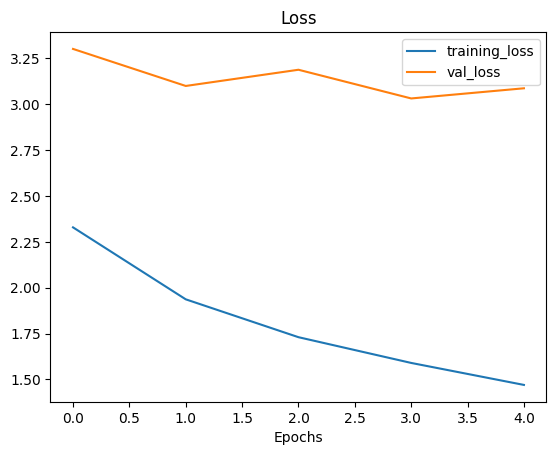

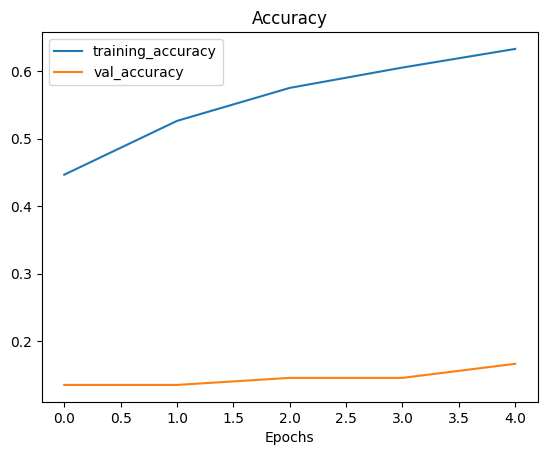

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Fine tuning
# Unfreeze all of the layers
base_model.trainable = True

# Refreeze every layer except last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for layer_no, layer in enumerate(base_model.layers):
  print(layer_no, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_redu

In [ ]:
# Compile the model again
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

fine_tune_epochs = 10

history_2 = model.fit(train_data_10_percentage,
                      epochs = fine_tune_epochs,
                      initial_epoch=history_1.epoch[-1],
                       validation_data=test_data_10_percentage,
                      validation_steps=int(0.15 * len(test_data_10_percentage) // 32),
                      callbacks=[check_point_callback]
                      )

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 55s 164ms/step - accuracy: 0.6273 - loss: 1.5366 - val_accuracy: 0.1979 - val_loss: 3.1422
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.6803 - loss: 1.3130 - val_accuracy: 0.2188 - val_loss: 3.1137
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.6974 - loss: 1.2113 - val_accuracy: 0.2500 - val_loss: 2.8993
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.7062 - loss: 1.1538 - val_accuracy: 0.2188 - val_loss: 3.0451
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - accuracy: 0.7318 - loss: 1.0902 - val_accuracy: 0.2500 - val_loss: 2.9435
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 144ms/step - accuracy: 0.7395 - loss: 1.0327 - val_accuracy: 0.2604 - val_loss: 2.8566


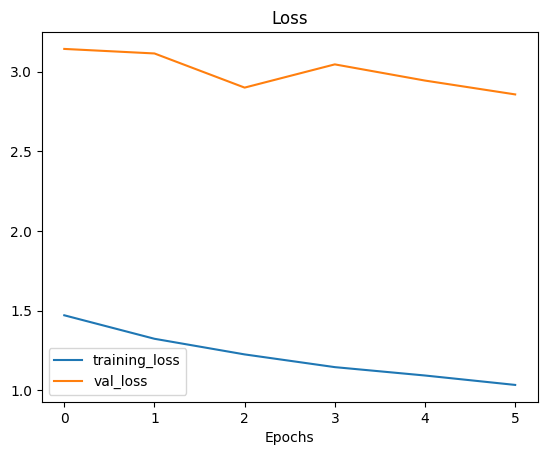

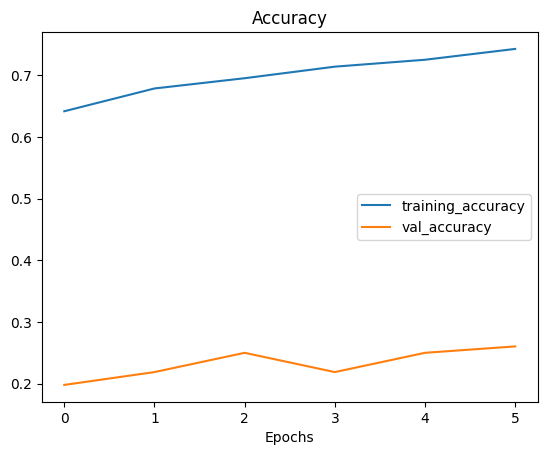

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model.evaluate(test_data_10_percentage)

790/790 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.6047 - loss: 1.5031


[1.4059181213378906, 0.6236435770988464]

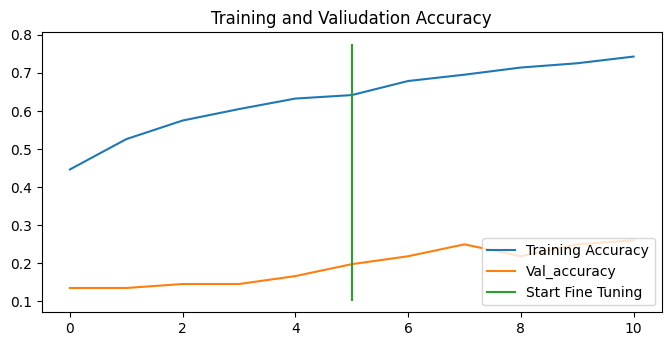

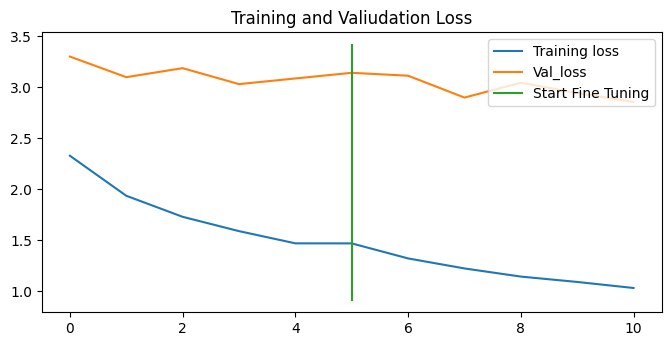

In [ ]:
compare_historys(history_1, history_2, initial_epochs=5)